In [1]:
from DataReader import DataReader

dr = DataReader(hours=9)
X,y = dr.data()

In [2]:
import numpy as np

In [3]:
X = np.concatenate((X,(X**2),(X**3)),axis=1)

In [4]:
def normal(X):
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X-mu)/std
    return X_norm,mu,std

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)
X_train_norm,mu,std = normal(X_train)
X_test_norm = (X_test-mu)/std

In [25]:
from LinearRegressionModel import LinearRegreesionModel

In [26]:
model = LinearRegreesionModel(lr=0.01,lbd=100,epoches=10000)
# model = LinearRegreesionModel(lr=0.01,lbd=0,epoches=10000)
model.fit(X_train_norm,y_train,X_test_norm,y_test)
train_loss_history,test_loss_history,grad_history = model.history()

epoch:1000 train loss:18.116303947811986 test loss:21.769003190537713
epoch:2000 train loss:17.61692252105341 test loss:21.22321429289892
epoch:3000 train loss:17.51622619679806 test loss:21.100174905468776
epoch:4000 train loss:17.487588906214032 test loss:21.06230115389824
epoch:5000 train loss:17.47823978396306 test loss:21.04447290654393
epoch:6000 train loss:17.474961374314063 test loss:21.032219724409178
epoch:7000 train loss:17.473759068152653 test loss:21.02280163138191
epoch:8000 train loss:17.47330365029247 test loss:21.01563402492317
epoch:9000 train loss:17.473126626486334 test loss:21.010347760623006
epoch:10000 train loss:17.473056277055584 test loss:21.006555022699377


(17.86834651478442, 21.389176590997817)

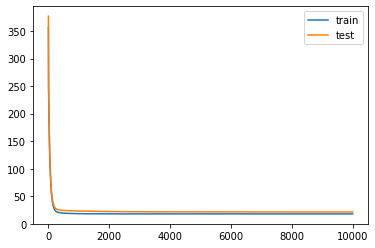

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_loss_history)
plt.plot(test_loss_history)
plt.legend(['train','test'])

train_loss_history[-1],test_loss_history[-1]

In [19]:
p = model.predict(X_train_norm)

In [20]:
import torch.nn as nn
import torch

In [21]:
criterion = nn.MSELoss()

In [22]:
criterion(torch.from_numpy(p.astype(np.float32)),torch.from_numpy(y_train.astype(np.float32)))

tensor(30.8668)

In [16]:
27.9988/2

13.9994